In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeRegressor
import pandas_profiling

In [8]:
data = pd.read_csv("Salary_Data.csv")

In [9]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [11]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [12]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [15]:
Data_profile = pandas_profiling.ProfileReport(data)
Data_profile

In [16]:
# Lets Visualize the data

Text(0.5, 1.0, 'Experience vs Salary')

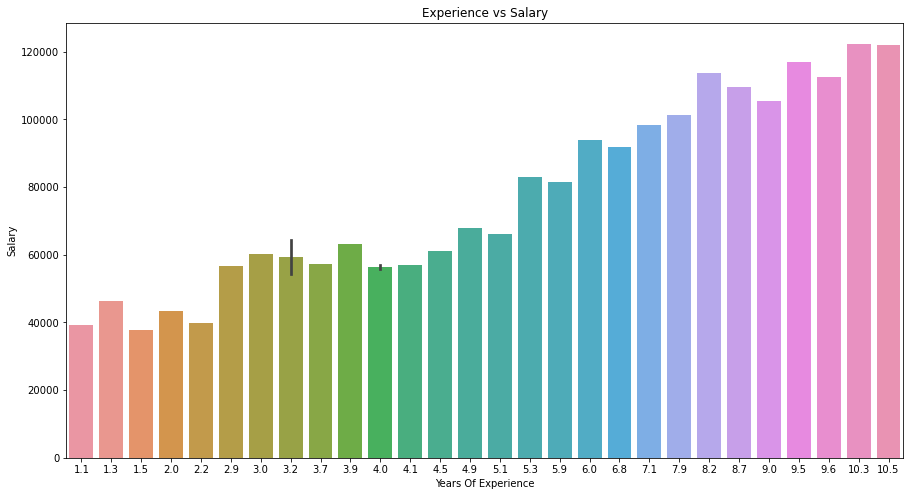

In [22]:
plt.figure(figsize=(15,8))


sns.barplot(data.YearsExperience,data.Salary)
plt.xlabel("Years Of Experience")
plt.ylabel("Salary")
plt.title("Experience vs Salary")


Text(0, 0.5, 'Experience VS Salary')

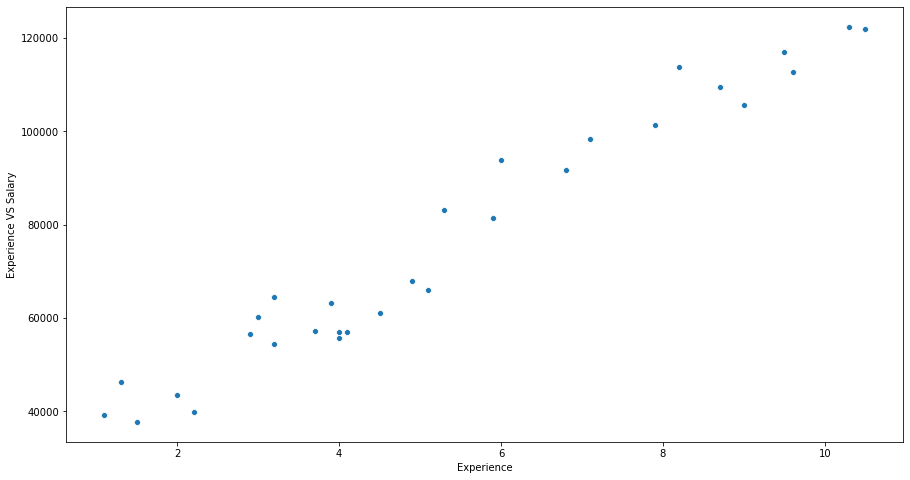

In [24]:
plt.figure(figsize=(15,8))

sns.scatterplot(data.YearsExperience,data.Salary)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.ylabel("Experience VS Salary")

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Experience'),
 Text(0.5, 1.0, 'datapoints available wrt Experience')]

<Figure size 1080x576 with 0 Axes>

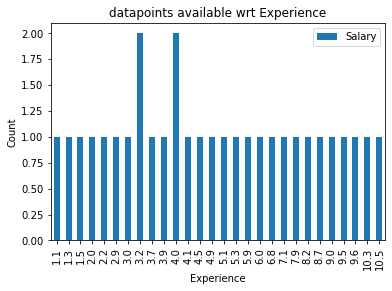

In [34]:
plt.figure(figsize=(15,8))
ex =data.groupby("YearsExperience").count().plot(kind="bar")
ex.set(xlabel="Experience",ylabel="Count",title="datapoints available wrt Experience")

Text(0, 0.5, 'Salary Spread wrt Experience')

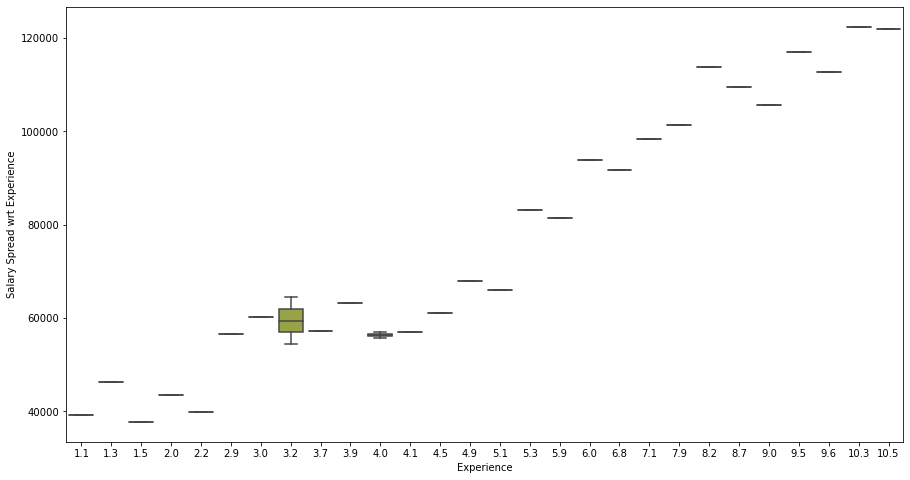

In [36]:
plt.figure(figsize=(15,8))

sns.boxplot(data.YearsExperience,data.Salary)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.ylabel("Salary Spread wrt Experience")

In [37]:
# Observations

# there are 2 datapoints/ Salary available for 3.2 adn 4.1 years experience, and there is large Salary gap for persons with 3.2 years experience

# Salary Showing Positive behaviour with Experience

# Dataset dont have any outlier

In [38]:
# Lets split data for training and testing

x_train, x_test, y_train,y_test = train_test_split(data.YearsExperience,data.Salary,test_size=0.3,random_state=101)

In [40]:
# Lets Create Decison Tree regressor and fit the test data to it

DTR = DecisionTreeRegressor()

DTR.fit(x_train[:,np.newaxis],y_train[:,np.newaxis])

DecisionTreeRegressor()

In [45]:
predictions_on_train = DTR.predict(x_train[:,np.newaxis])
predictions_on_test= DTR.predict(x_test[:,np.newaxis])

Text(0.5, 1.0, 'Actual vs Predicted Salary')

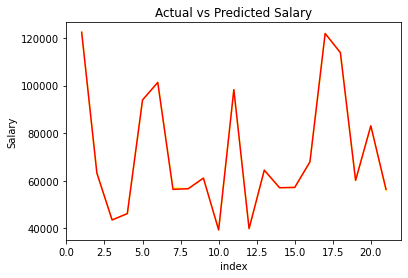

In [71]:
c = [i for i in range(1,len(y_train)+1,1)]
plt.plot(c, y_train,color="Yellow")
plt.plot(c,predictions_on_train,color="Red")
plt.xlabel("index")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary")

Text(0.5, 1.0, 'Actual vs Predicted Salary')

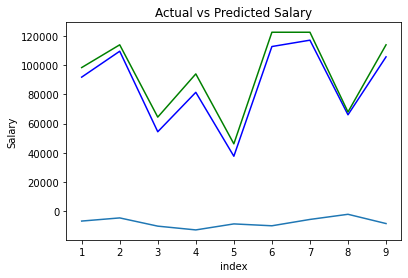

In [94]:
#Error Distribution

c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c, y_test,color="blue")
plt.plot(c,predictions_on_test,color="green")
plt.plot(c,error)
plt.xlabel("index")
plt.ylabel("Salary")
plt.title("Actual vs Predicted Salary")

Text(0.5, 1.0, 'Error')

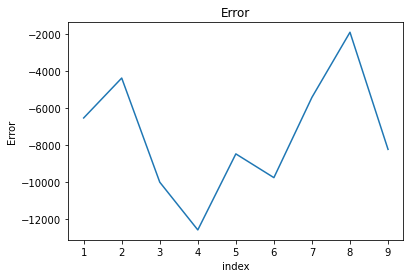

In [96]:
# Plotting the error 
error = y_test - predictions_on_test
c = [i for i in range(1, len(y_test)+1,1)]
plt.plot(c,error)
plt.xlabel("index")
plt.ylabel("Error")
plt.title("Error")

[Text(730.7142857142858, 1283.5, 'X[0] <= 5.1\nmse = 670242004.857\nsamples = 21\nvalue = 71627.0'),
 Text(398.57142857142856, 1132.5, 'X[0] <= 2.55\nmse = 77622390.964\nsamples = 14\nvalue = 54963.5'),
 Text(132.85714285714286, 981.5, 'X[0] <= 1.2\nmse = 7820714.0\nsamples = 4\nvalue = 42241.0'),
 Text(66.42857142857143, 830.5, 'mse = 0.0\nsamples = 1\nvalue = 39343.0'),
 Text(199.28571428571428, 830.5, 'X[0] <= 2.1\nmse = 6694994.667\nsamples = 3\nvalue = 43207.0'),
 Text(132.85714285714286, 679.5, 'X[0] <= 1.65\nmse = 1795600.0\nsamples = 2\nvalue = 44865.0'),
 Text(66.42857142857143, 528.5, 'mse = 0.0\nsamples = 1\nvalue = 46205.0'),
 Text(199.28571428571428, 528.5, 'mse = 0.0\nsamples = 1\nvalue = 43525.0'),
 Text(265.7142857142857, 679.5, 'mse = 0.0\nsamples = 1\nvalue = 39891.0'),
 Text(664.2857142857143, 981.5, 'X[0] <= 4.7\nmse = 14900338.25\nsamples = 10\nvalue = 60052.5'),
 Text(597.8571428571429, 830.5, 'X[0] <= 3.95\nmse = 8879251.111\nsamples = 9\nvalue = 59176.333'),
 Te

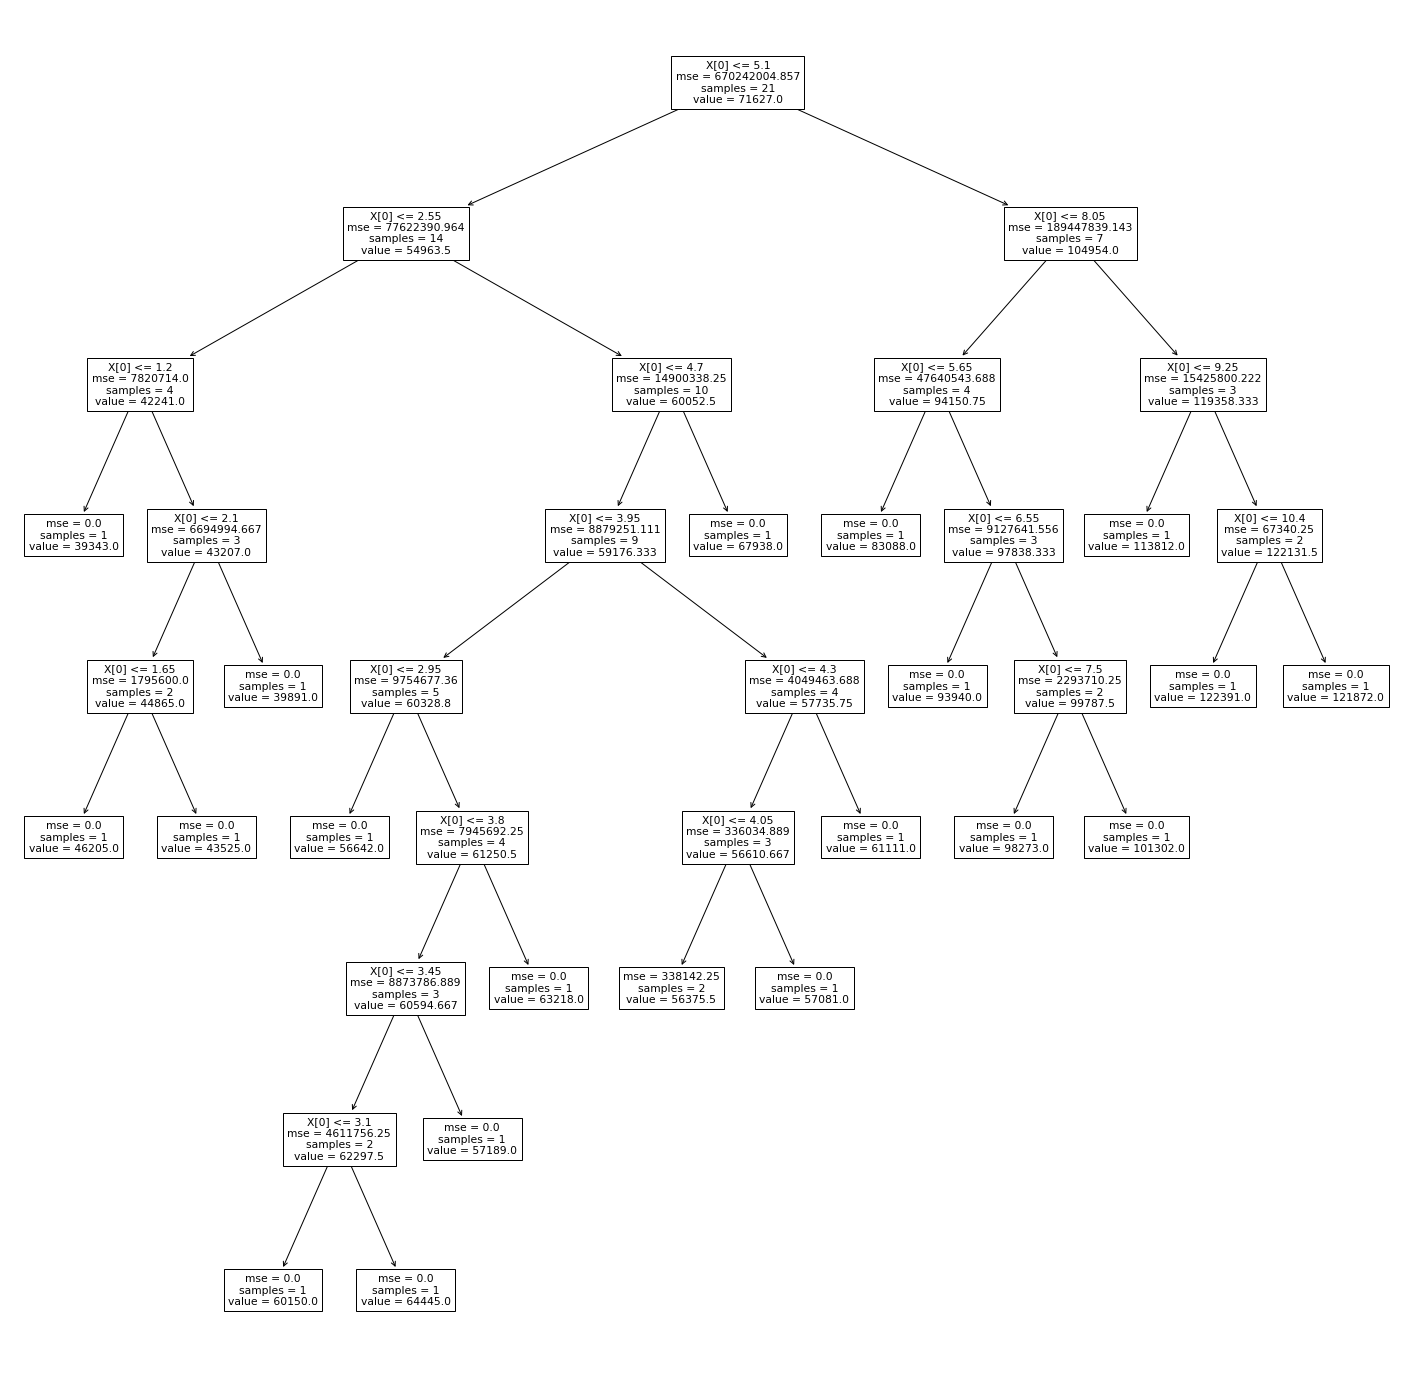

In [107]:
#Visualizing the decision tree
plt.figure(figsize=(25,25))
tree.plot_tree(DTR)